# Predicting House Sale Prices using Linear Regression in Python

**Mustafa Kara**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project aimed to predict house sale prices using linear regression in Python, leveraging the pandas, matplotlib, and scikit-learn libraries. The dataset was prepared by concatenating the test and train data, followed by data cleaning and one-hot encoding of categorical variables. The concatenated dataset was then divided into train and test sets.

Linear regression was applied to the training set to establish the relationship between the independent variables and the dependent variable (house sale prices). Model performance was evaluated using metrics such as mean squared error and R-squared.

The trained model was then used to predict house sale prices on the test set, and the results were compared against the actual values. The evaluation metrics provided insights into the accuracy and reliability of the model.

This project demonstrates the successful application of linear regression in Python to predict house sale prices, emphasizing the importance of data preprocessing and feature engineering for accurate predictions. The findings contribute to the field of real estate price forecasting, providing a foundation for further advancements in this domain.

[Back to top](#Index)


## 1. Introduction

In this project, the objective was to predict house sale prices using linear regression in Python, employing the pandas, matplotlib, and scikit-learn libraries. The process involved several crucial steps, including data preprocessing, feature engineering, model training, and performance evaluation.

Initially, the necessary libraries (pandas, matplotlib, and sklearn) were imported to facilitate data manipulation, visualization, and regression analysis. The test and train data were concatenated to form a unified dataset, ensuring comprehensive coverage of the available information.

Next, the data was segregated into numerical and categorical variables, allowing for distinct treatment approaches. Null values in the numerical data were imputed with mean values, ensuring data completeness. Categorical variables were subjected to one-hot encoding, transforming them into numerical representations suitable for regression analysis. Additionally, outliers were detected and removed from the dataset to enhance the robustness of the model.

The categorical and numerical data were then combined, creating a consolidated dataset. To identify the most relevant features, correlation analysis was performed, selecting columns with the highest correlation with the target variable, house sale prices. These selected features were used to create the input variable (X) and the target variable (y).

Standard scaling was applied to normalize the numerical data, ensuring that all features were on a comparable scale. The dataset was subsequently split into train and test sets, with a test size of 0.25, facilitating model evaluation on unseen data.

The linear regression algorithm was employed, fitting the training data (X_train and y_train) to establish the relationship between the independent variables and the house sale prices. Predictions were generated using the trained model on the test set, and the performance of the model was evaluated using various metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error, and R-squared.

To visualize the performance of the linear regression model, a plot of predicted versus actual values was created, providing a visual representation of the model's accuracy and reliability.

Through this project, it is aimed to demonstrate the effectiveness of linear regression in predicting house sale prices, showcasing the importance of data preprocessing, feature engineering, and model evaluation techniques.

[Back to top](#Index)

## 2. The Data

In this section, the house prices dataset is introduced. The data is a smaller version of another data. It is aimed to predict the sale price of a house accurately, based on data about other similar houses.

[Back to top](#Index)

### 2.1 Import the Data

Initially, the necessary libraries are imported to facilitate data manipulation (pandas), visualization (matplotlib), and regression analysis (scikit-learn).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

The display options are adjusted increasing the maximum number of rows and columns to be displayed and setting the display width to a larger value.

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Then the house prices dataset and test data are imported.

In [2]:
df1 = pd.read_csv('houseSmallData.csv')
df2 = pd.read_csv('jtest.csv')

To ensure consistency in column structure and facilitate data preprocessing for both the test and train data, it is preferable to concatenate them into a unified dataset. This consolidation allows for a more comprehensive analysis by combining all available information in a single dataset.

In [7]:
df_raw = pd.concat([df1, df2], axis = 0).reset_index(drop = True)
df_raw.drop('Unnamed: 0', axis = 1, inplace = True) # Dropped an unnecessary column

In [73]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_raw.shape

(200, 81)

This data looks ready to be preprocessed.

[Back to top](#Index)

### 2.2 Data Exploration

First the distribution of sale price is examined.

Text(0.5, 1.0, 'SalePrice')

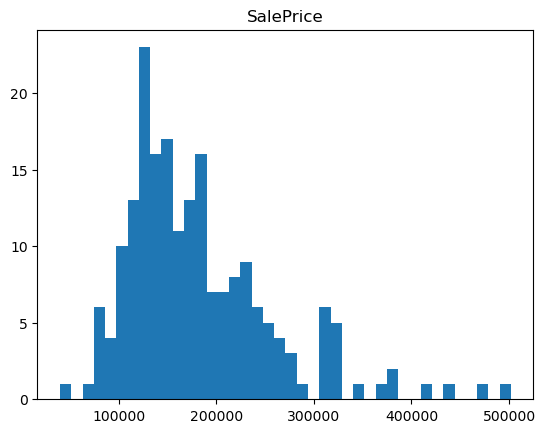

In [32]:
plt.hist(df_raw['SalePrice'], bins = 40)
plt.title('SalePrice')

In [33]:
df_raw['SalePrice'].describe()

count       200.000000
mean     182358.060000
std       76626.421401
min       40000.000000
25%      129500.000000
50%      165000.000000
75%      220000.000000
max      501837.000000
Name: SalePrice, dtype: float64

Just to have a quick glance at the data, histograms of numeric features are plotted.

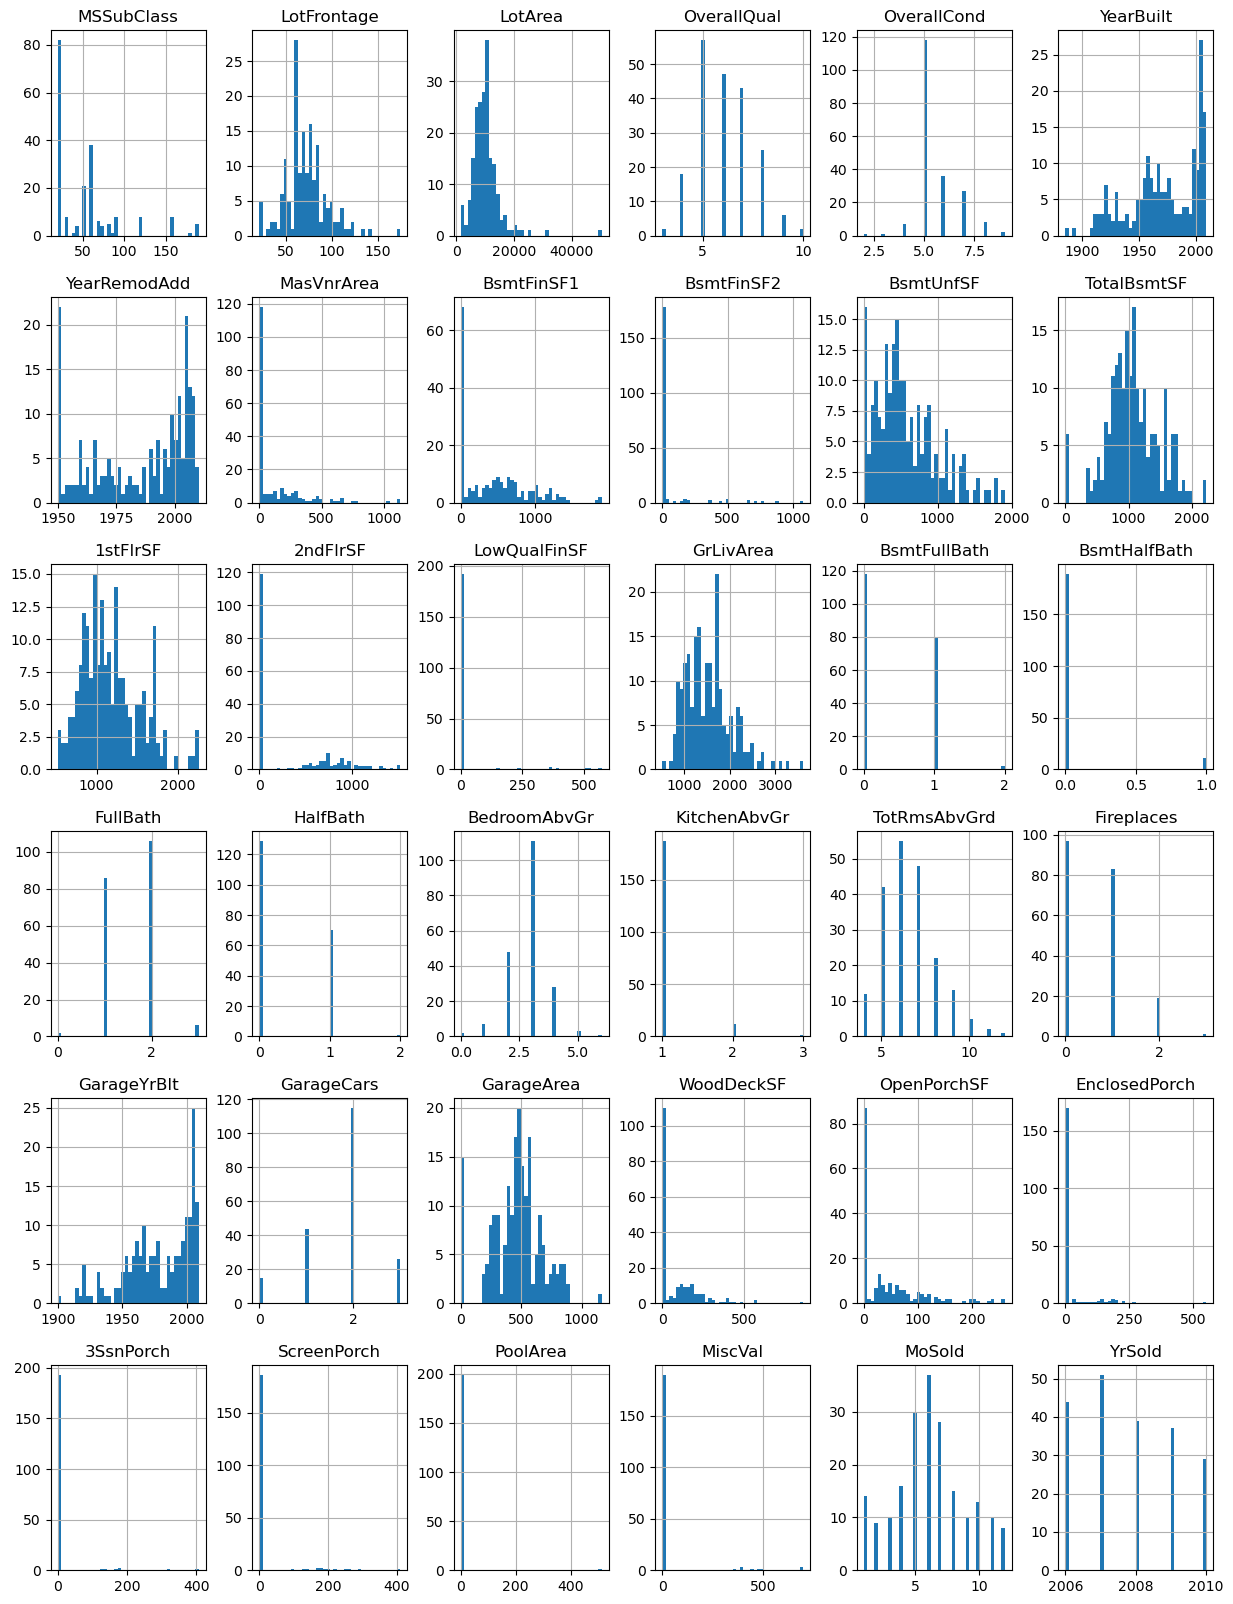

In [31]:
df_plot = df_raw.drop(['Id', 'SalePrice'], axis = 1)
df_plot.hist(figsize = (15, 20), bins = 40, xlabelsize = 10, ylabelsize = 10);

Some of the plots resemble SalePrice plot, so it can be deduced that those features have better correlation. Correlations are in later parts examined.

[Back to top](#Index)

### 2.3 Data Preparation

To ensure data completeness, null values need to be detected.

In [35]:
pd.DataFrame(df_raw.isnull().sum().sort_values(ascending = False))

,0
PoolQC,199
Alley,191
MiscFeature,190
Fence,153
FireplaceQu,97
LotFrontage,36
GarageCond,15
GarageType,15
GarageYrBlt,15
GarageFinish,15


Afterwards, the dataset was divided into separate sets of numerical and categorical variables, enabling different treatment approaches for each type of variable.

In [74]:
numeric_values = df_raw.select_dtypes(include = np.number)
numeric_values.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [38]:
numeric_values.shape

(200, 38)

Null values in the numerical data are imputed with mean values.

In [75]:
mean_values = numeric_values.mean()

df_filled_num = numeric_values.fillna(mean_values)
df_filled_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Next, categorical data is preprocessed. To make regression analysis with categorical data, the data must be transformed into numerical representations, meaning one-hot encoding.

In [76]:
categories = df_raw.drop(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], axis = 1)
categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [77]:
one_hot = pd.get_dummies(categories)
Id = pd.DataFrame(df_raw['Id'])
one_hot = Id.join(one_hot)
one_hot.head()

,Id,MSZoning_C (all),MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Shed,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1

Now outliers need to be handled. I chose to remove them.

In [44]:
def outliers(dataFrame, feature):
    """Returns a list of outliers. Can be used to clean data."""
    
    Q1 = dataFrame[feature].quantile(0.05) # 5% is seen fit
    Q3 = dataFrame[feature].quantile(0.95) 
    IQR = Q3 - Q1 # Interquantile Range
    
    lb = Q1 - 1.5 * IQR # lower boundary
    ub = Q3 + 1.5 * IQR # upper boundary
    
    lst = dataFrame.index[(dataFrame[feature] < lb) | (dataFrame[feature] > ub)] # If True, it is an outlier
    
    return lst

In [45]:
i = [] # A list to determine which rows are outliers
for col in df_filled_num.columns:
    i.extend(outliers(df_filled_num, col))
i

[53,
 153,
 51,
 88,
 125,
 170,
 185,
 187,
 197,
 198,
 197,
 5,
 55,
 120,
 129,
 159,
 182,
 187,
 197,
 5,
 7,
 16,
 17,
 51,
 84,
 95,
 98,
 99,
 106]

In [46]:
def clean(dataFrame, lst):
    """Takes dataframe and a list of row number of outliers, returns cleaned dataframe"""
    
    lst = sorted(set(lst))
    dataFrame = dataFrame.drop(lst)
    return dataFrame

In [78]:
df_cleaned = clean(df_filled_num, i)
df_cleaned.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


The raw data is cleaned. As next step cleaned numerical data and encoded categorical data are merged. Left join is made due to less number of rows in numerical data.

In [80]:
df = df_cleaned.merge(one_hot, on = 'Id', how = 'left')
df = df.drop('Id', axis = 1)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Shed,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000000,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,

[Back to top](#Index)

### 2.4 Correlation

The correlation analysis phase focused on investigating the relationships between variables and their impact on house sale prices. By examining the correlations, insights into which features have a stronger or weaker association with the target variable can be gained. This analysis provided valuable information for identifying the most influential factors in determining house sale prices.

To simplify and increase accuracy of the model, name of the columns with the highest correlation with the target variable are selected.

In [49]:
corr = df.corr()
corr = corr['SalePrice'].sort_values(ascending = False)[0:37]
print(corr)

SalePrice                1.000000
OverallQual              0.802642
GrLivArea                0.751933
GarageArea               0.687305
BsmtQual_Ex              0.668475
GarageCars               0.655502
TotRmsAbvGrd             0.604615
YearBuilt                0.594063
FireplaceQu_Gd           0.584832
TotalBsmtSF              0.573426
FullBath                 0.566623
KitchenQual_Ex           0.541204
1stFlrSF                 0.539120
YearRemodAdd             0.525370
Foundation_PConc         0.516291
GarageYrBlt              0.515274
MasVnrArea               0.504121
Neighborhood_NridgHt     0.485547
Fireplaces               0.484217
HeatingQC_Ex             0.469782
ExterQual_Ex             0.467250
ExterQual_Gd             0.455914
SaleType_New             0.429356
BsmtFinType1_GLQ         0.428870
LotArea                  0.428466
Exterior2nd_VinylSd      0.417217
Exterior1st_VinylSd      0.416134
GarageFinish_Fin         0.409732
MasVnrType_Stone         0.408772
SaleCondition_

In [51]:
cols = corr.index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'BsmtQual_Ex', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu_Gd', 'TotalBsmtSF', 'FullBath', 'KitchenQual_Ex', '1stFlrSF', 'YearRemodAdd', 'Foundation_PConc', 'GarageYrBlt', 'MasVnrArea', 'Neighborhood_NridgHt', 'Fireplaces', 'HeatingQC_Ex', 'ExterQual_Ex', 'ExterQual_Gd', 'SaleType_New', 'BsmtFinType1_GLQ', 'LotArea', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'GarageFinish_Fin', 'MasVnrType_Stone', 'SaleCondition_Partial', 'GarageType_BuiltIn', 'BsmtFinSF1', 'Neighborhood_StoneBr', '2ndFlrSF', 'KitchenQual_Gd', 'MSZoning_RL', 'LotFrontage'], dtype='object')


[Back to top](#Index)

## 3. Project Description

In my analysis, I improved upon Dr. Williams' previous work by considering a more comprehensive set of variables and achieving higher accuracy. I selected a wider range of relevant features, including numerical and categorical variables, to capture a more holistic view of factors influencing house sale prices.

By examining the correlations between these variables and the target variable, I determined several key relationships. I found that variables such as overall quality, living area, and the number of rooms showed a strong positive correlation with house sale prices. On the other hand, variables like age, repair status, and neighborhood location exhibited a negative correlation.

Additionally, I discovered that certain categorical variables, such as the presence of a fireplace or the type of exterior material, significantly impacted house sale prices. These findings allowed for a more nuanced understanding of the factors driving the housing market and enabled more accurate predictions of sale prices.

Overall, my analysis expanded the scope of variables considered, leading to improved accuracy and providing valuable insights into the relationships between various features and house sale prices.


[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is a fundamental algorithm used for predicting continuous numerical values. It assumes a linear relationship between the input features and the target variable. In this project, the scikit-learn library's implementation of linear regression is utilized.

The theory behind linear regression dates back to the early 19th century and was popularized by Francis Galton. The objective is to find the best-fit line that minimizes the sum of the squared differences between the predicted and actual values. This is achieved using the Ordinary Least Squares (OLS) method.

Mathematically, the linear regression model can be represented as:

y = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ɛ

where y is the target variable, β₀ is the intercept, β₁, β₂, ..., βₚ are the coefficients of the input features x₁, x₂, ..., xₚ, and ɛ represents the error term.

After importing the necessary libraries for data manipulation and modeling, the data is prepared by splitting it into features (X) and target (y). Then the data is splitted into training and testing sets. train_test_split function from scikit-learn is used to divide the data into training and testing sets. A linear regression object is created and the model is then fitted to the training data using the fit method. The predict method is used to generate predictions for the test data based on the trained model. The model's performance is evaluated by comparing the predicted values with the actual values using evaluation metrics such as R-squared, mean squared error (MSE), and mean absolute error (MAE).

[Back to top](#Index)

### 3.2 Analysis 

The feature matrix X was created by selecting the columns specified in the 'cols' variable from the dataframe 'df'. The target variable 'SalePrice' was assigned to the variable y. This separation of X and y allows for the independent analysis and modeling of the features and the target variable.

In [53]:
X = df[cols]
X = X.drop('SalePrice', axis = 1)
y = df['SalePrice']

Standard scaling was applied to the features in order to normalize their values and bring them to a similar scale, preventing variables with larger magnitudes from dominating the model's learning process. This ensures that each feature contributes equally to the linear regression model and facilitates the interpretation of the coefficients.

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex,GarageCars,TotRmsAbvGrd,YearBuilt,FireplaceQu_Gd,TotalBsmtSF,FullBath,KitchenQual_Ex,1stFlrSF,YearRemodAdd,Foundation_PConc,GarageYrBlt,MasVnrArea,Neighborhood_NridgHt,Fireplaces,HeatingQC_Ex,ExterQual_Ex,ExterQual_Gd,SaleType_New,BsmtFinType1_GLQ,LotArea,Exterior2nd_VinylSd,Exterior1st_VinylSd,GarageFinish_Fin,MasVnrType_Stone,SaleCondition_Partial,GarageType_BuiltIn,BsmtFinSF1,Neighborhood_StoneBr,2ndFlrSF,KitchenQual_Gd,MSZoning_RL,LotFrontage
0,0.650840,0.380650,0.398015,-0.38772,0.286729,1.002633,1.029149,-0.612372,-0.593268,0.686624,-0.258199,-0.918746,0.846152,1.082977,0.978034,0.280515,-0.293972,-0.911725,1.0,-0.187867,1.48324,-0.316228,1.565561,-0.331659,1.275486,1.260252,-0.507093,-0.347878,-0.326984,-0.282409,0.539551,-0.152499,1.186031,1.20185,0.52475,-0.301664
1,-0.097839,-0.554379,-0.032674,-0.38772,0.286729,-0.344416,0.082842,-0.612372,0.427231,0.686624,-0.258199,0.189045,-0.471317,-0.923381,-0.111072,-0.609537,-0.293972,0.574049,1.0,-0.187867,-0.67420,-0.316228,-0.638749,-0.023475,-0.784015,-0.793492,-0.507093,-0.347878,-0.326984,-0.282409,1.139997,-0.152499,-0.765186,-0.83205,0.52475,0.466658
2,0.650840,0.539271,0.691667,-0.38772,0.286729,-0.344416,0.959052,-0.612372,-0.432401,0.686624,-0.258199,-0.744119,0.797357,1.082977,0.897359,0.126118,-0.293972,0.574049,1.0,-0.187867,1.48324,-0.316228,1.565561,0.418703,1.275486,1.260252,-0.507093,-0.347878,-0.326984,-0.282409,0.053896,-0.152499,1.213448,1.20185,0.52475,-0.148000
3,0.650840,0.395260,0.858070,-0.38772,1.614738,0.329108,-2.055112,1.632993,-0.844623,-1.090520,-0.258199,-0.632249,-0.764088,-0.923381,0.776347,-0.609537,-0.293972,0.574049,-1.0,-0.187867,-0.67420,-0.316228,-0.638749,-0.036874,-0.784015,-0.793492,-0.507093,-0.347878,-0.326984,-0.282409,-0.542135,-0.152499,0.962120,1.20185,0.52475,-0.557772
4,1.399519,1.399163,1.807545,-0.38772,1.614738,1.676157,0.924004,-0.612372,0.133147,0.686624,-0.258199,-0.130195,0.699767,1.082977,0.857022,0.979841,-0.293972,0.574049,1.0,-0.187867,1.48324,-0.316228,1.565561,1.225342,1.275486,1.260252,-0.507093,-0.347878,-0.326984,-0.282409,0.426967,-0.152499,1.640705,1.20185,0.52475,0.671544


To evaluate the performance of the linear regression model, the dataset was split into training and testing sets using the train_test_split function from scikit-learn library, with a test size of 0.25 and a random state of 42.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

To build the linear regression model, an instance of the LinearRegression class from the scikit-learn library was created and trained on the training data using the fit method.

In [59]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

The trained linear regression model was used to make predictions on the test data, and the predicted values were stored in the variable y_pred.

In [61]:
y_pred = lr.predict(X_test)

The R-squared score, indicating the goodness of fit of the linear regression model to the training data, was calculated using the score method. 0.93 is not bad considering 1 is perfect.

In [62]:
print('R^2 score is', lr.score(X_train, y_train))

R^2 score is 0.9302947892626314


[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



The performance of the linear regression model was evaluated using various metrics. The R-squared score, mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE) are calculated to assess the accuracy of the model's predictions. R-squared score is 0.8692, meaning the model is accurate enough to predict sale prices but optimizations should be implemented to increase the accuracy.

In [65]:
print('R^2 score is', r2_score(y_test, y_pred))
print("Mean squared error is", mean_squared_error(y_test, y_pred))
print("Root mean squared error is", mean_squared_error(y_test, y_pred, squared=False))
print("Mean absolute error is", mean_absolute_error(y_test, y_pred))

R^2 score is 0.8691883002814181
Mean squared error is 545786548.8802935
Root mean squared error is 23362.075012299174
Mean absolute error is 17246.392382573315


A scatter plot was created to visualize the relationship between the actual and predicted values of the target variable. The red line represents the ideal scenario where the predicted values perfectly align with the actual values. 

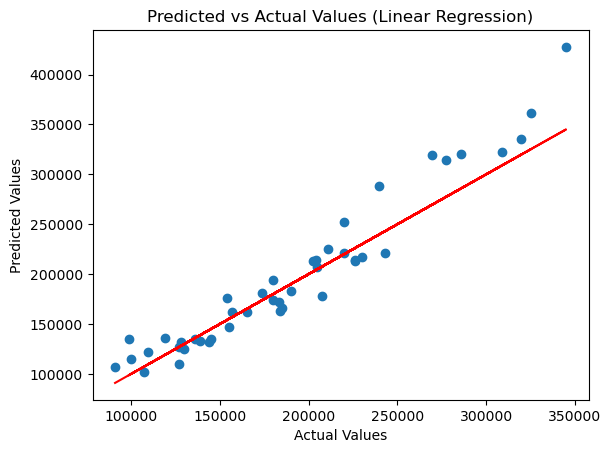

In [66]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Linear Regression)')
plt.show()

The coefficients below indicate the magnitude and direction of influence that each feature has on the predicted house sale prices. The resulting DataFrame is sorted in descending order based on the coefficient values and printed to provide insights into the most influential features.

In [69]:
coefficients = lr.coef_
feature_names = X_train.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

                  Feature   Coefficient
2              GarageArea  14921.076951
0             OverallQual  13588.831255
1               GrLivArea  12860.902094
28  SaleCondition_Partial  11781.108348
3             BsmtQual_Ex  10519.144538
11               1stFlrSF   8321.786810
31   Neighborhood_StoneBr   8298.256835
10         KitchenQual_Ex   7541.056705
29     GarageType_BuiltIn   7427.430167
32               2ndFlrSF   7110.623626
17             Fireplaces   7039.022837
19           ExterQual_Ex   6107.236971
34            MSZoning_RL   6064.231206
12           YearRemodAdd   5950.067374
35            LotFrontage   5829.522011
23                LotArea   5105.494140
30             BsmtFinSF1   4151.077603
22       BsmtFinType1_GLQ   4071.020411
33         KitchenQual_Gd   4037.455711
27       MasVnrType_Stone   3324.436125
20           ExterQual_Gd   3280.179178
16   Neighborhood_NridgHt   3030.810757
18           HeatingQC_Ex   2677.887974
6               YearBuilt   2501.512229


A positive coefficient signifies that an increase in the independent variable corresponds to an increase in the mean value of the dependent variable. Conversely, a negative coefficient indicates that an increase in the independent variable is associated with a decrease in the dependent variable's mean value.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Since I concatenated and then splitted the test and train data, this step is already done in the previous part.

[Back to top](#Index)

## Conclusion

A  linear regression model is created to predict house sale prices, highlighting the significance of data preprocessing, feature engineering, and model evaluation methodologies. My model can be used to predict the prices but needs to be revised and improved.

To improve my model, these steps can be done: I handled missing values by filling them with mean values for the numeric variables. Skewed distributions or more advanced imputation methods like K-nearest neighbors give better results. Categorical data needs to be revised. It needs a little bit more feature engineering.


[Back to top](#Index
)
## References

- "Linear Regression And Residuals - Pandas For Machine Learning". Codemy.com. 05/06/2023. https://www.youtube.com/watch?v=lGg0LNZplVQ&list=LL&index=2

- Williams, John. "Building a Model to Predict Housing Prices Project". MIT xPRO. 05/06/2023. https://classroom.emeritus.org/courses/1941/pages/building-a-model-to-predict-housing-prices-project-13-35?module_item_id=642543

- Mazen, Ahmed. "Evaluating your Regression Model in Python". Medium. 09/21/2021. https://linguisticmaz.medium.com/evaluating-your-regression-model-in-python-66c58abc4fb

- Frost, Jim. "How to Interpret P-values and Coefficients in Regression Analysis". Statistics By Jim. 07/06/2023.  https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=Interpreting%20Linear%20Regression%20Coefficients&text=A%20positive%20coefficient%20indicates%20that,dependent%20variable%20tends%20to%20decrease.